**Components of a Time Series**
A time series is composed of mainly trend, seasonality, and noise. We will take a look at the component parts of a time series, focusing on automated decomposition methods. This will give you some intuition about the components of time series.

**Trend**
When we talk about trend, we are talking about how the series data increases or decreases over time. Is it moving higher or lower over the time frame? The series is either uptrend or downtrend, both of which are non-stationary.

**Seasonality**
Seasonality refers to a repeating periodic or cyclical pattern with regular intervals within a series. The pattern is within a fixed time period and it repeats itself at regular intervals. There can be upward or downward swings but it continues to repeat over a fixed period of time as in a cycle. Cyclicality could repeat but it has no fixed period.

Noise
In general, noise captures the irregularities or random variation in the series. It can have erratic events or simply random variation. It has a short duration. It is hard to predict due to its erratic occurrence.

In [0]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plot

In [3]:
df_bac = pd.read_csv("df_bankofamerica.csv", parse_dates=['Date'], index_col=0)
df_bac.head()

,Adj Close Price
Date,
1990-01-02,1.711862
1990-01-03,1.725632
1990-01-04,1.688917
1990-01-05,1.652200
1990-01-08,1.661379


Text(0.5, 1.0, 'Adjusted Closing Price for Bank of America')

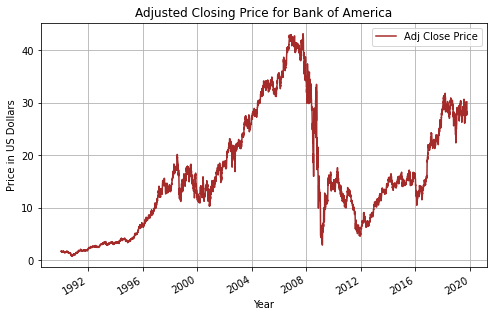

In [4]:
# Plot the time series
plot.style.use('seaborn-bright')
ax = df_bac.plot(color='brown', grid=True, figsize=(8,5))
ax.set_xlabel('Year')
ax.set_ylabel('Price in US Dollars')
ax.set_title('Adjusted Closing Price for Bank of America')


**Modelling Time Series**
**Additive Model **
An additive model is linear. y(t) = Level + Trend + Seasonality + Noise

It is useful when the variations around the trend does not vary with the level of the time series. Components are added together.

**Multiplicative Model**
A multiplicative model is non-linear: y(t) = Level Trend Seasonality * Noise

A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time. It is useful when the trend is proportional to the level of the time series. Components are multiplied together.

**Decomposing Time Series**

**Additive Model**

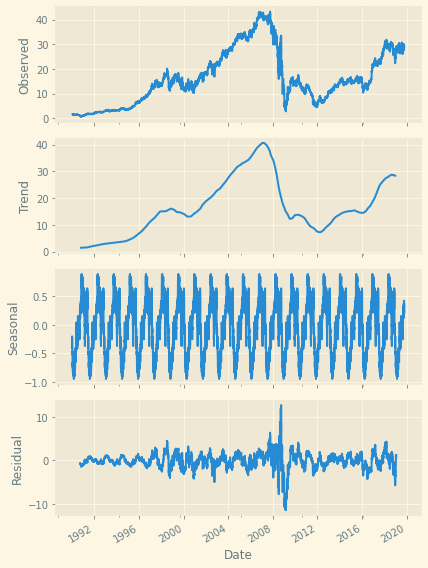

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 6, 8
plot.style.use('Solarize_Light2')

ts3 = df_bac['Adj Close Price']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts3, model='additive',freq=365)
result.plot()
plot.show()

**Multiplicative Model**/

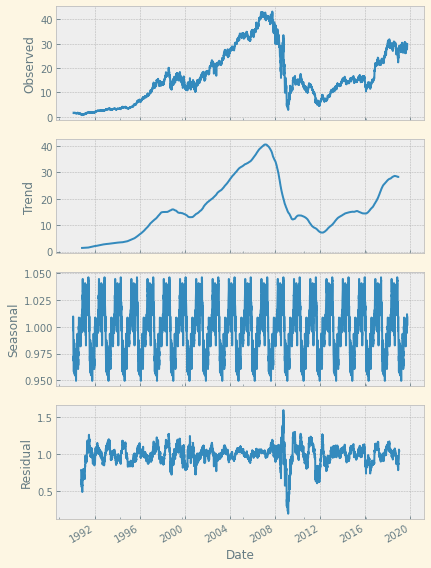

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from pylab import rcParams
rcParams['figure.figsize'] = 6, 8
plot.style.use('bmh')

ts3 = df_bac['Adj Close Price']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts3, model='multiplicative',freq=365)
result.plot()
plot.show()

Detrend and Deseasonalize a Time Series
When detrending and/or deseasonalizing a time series you may use one or a combination of approaches such as differencing, subtracting from the mean (or from a mean over a period), calculating percentage change, or using a transformation such as a log transformation. For instance, you make take first difference and then a log transformation or you may use a second difference. As you perform various operations (first difference, second difference, subtracting the mean, log transformation, percentage change), you will gain some intuition about how your data is being transformed.

You can achieve stationarity when you remove trend and seasonality. Stationarity of a times series is when you have constant mean and variance. It also means that autocovariance does not depend on time. Your time series should be stationary before applying any analysis.

In [14]:
df_furniture = pd.read_csv("df_furniture.csv")
df_furniture.head()

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618


Text(0.5, 1.0, 'Furniture Prices')

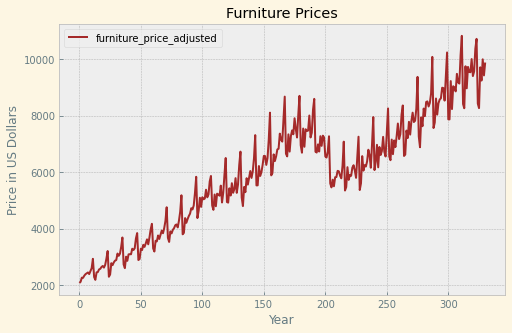

In [15]:
# Plot the time series
plot.style.use('seaborn-bright')
ax = df_furniture.plot(color='brown', grid=True, figsize=(8,5))
ax.set_xlabel('Year')
ax.set_ylabel('Price in US Dollars')
ax.set_title('Furniture Prices')

In [16]:
# Convert to datetime
from datetime import datetime
df_furniture['Month'] = pd.to_datetime(df_furniture['Month'])

# Set the 'Date' as index
df_furniture.set_index('Month', inplace=True)
df_furniture.head()

,furniture_price_adjusted
Month,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618


**Transformation**

**Log Transformation**

In [17]:
import numpy as np
df_furniture['furniture_log'] = np.log(df_furniture['furniture_price_adjusted'])
df_furniture.head()

,furniture_price_adjusted,furniture_log
Month,,
1992-01-01,2073.432724,7.636961
1992-02-01,2114.485812,7.656567
1992-03-01,2260.570891,7.723373
1992-04-01,2255.103236,7.720951
1992-05-01,2331.414618,7.754230


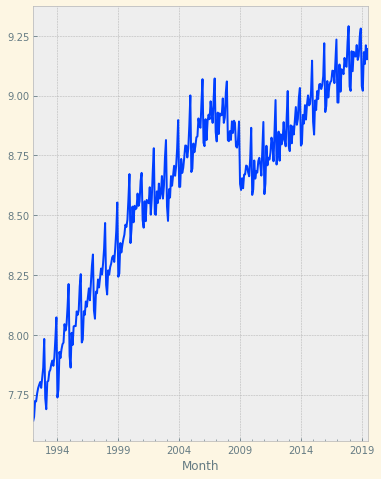

In [18]:
df_furniture['furniture_log'].plot()

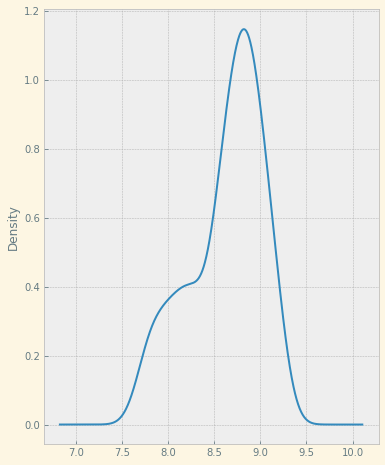

In [12]:
df_furniture['furniture_log'].plot(kind='kde')

**Differencing**

**First Differencing**
Differencing can help to reduce trend and seasonality. You can difference your data by subtraction. You subtract away the previous period from the current period. Below you will see that the first observation has a NaN because there was no previous period.

In [19]:
# Take first difference
df_furniture['furniture_diff'] = df_furniture['furniture_price_adjusted'].diff()

# Remove the first data point
df_furniture.dropna(inplace=True)

# Take a look at the head of the dataset
df_furniture.head()

,furniture_price_adjusted,furniture_log,furniture_diff
Month,,,
1992-02-01,2114.485812,7.656567,41.053088
1992-03-01,2260.570891,7.723373,146.085079
1992-04-01,2255.103236,7.720951,-5.467655
1992-05-01,2331.414618,7.754230,76.311382
1992-06-01,2384.638567,7.776803,53.223949


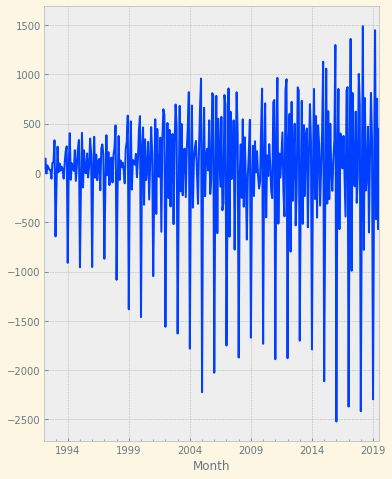

In [20]:

df_furniture['furniture_diff'].plot()

Second Differencing

In [24]:

# Take second differencing
df_furniture['furniture_diff_second'] = df_furniture['furniture_price_adjusted'].diff(2)

# Remove the first 2 data points
df_furniture.dropna(inplace=True)

# Take a look at the head of the dataset
df_furniture.head()


,furniture_price_adjusted,furniture_log,furniture_diff,furniture_diff_second
Month,,,,
1992-10-01,2489.350838,7.819777,101.999133,43.852109
1992-11-01,2598.186297,7.862569,108.835459,210.834592
1992-12-01,2928.725684,7.982323,330.539387,439.374846
1993-01-01,2284.619439,7.733955,-644.106246,-313.566858
1993-02-01,2183.137948,7.688519,-101.481490,-745.587736


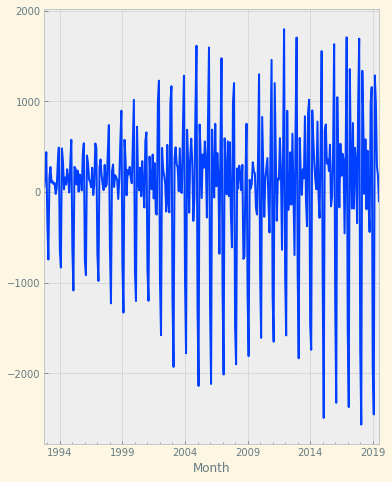

In [25]:
df_furniture['furniture_diff_second'].plot()

**Percentage Change**

**Percentage Change**
Recall that the original unit was in millions of dollars, which is sales of furniture and home furnishings. One type of differencing is percentage change, which is typically applied to money units in price amounts or sales in dollars.

Between each data point, we can calculate the percentage change. We will need to drop the first data point since it will become a Nan.

In [26]:
df_furniture['furniture_pct_change']= df_furniture['furniture_price_adjusted'].pct_change()
df_furniture.dropna(inplace=True)
df_furniture.head()

,furniture_price_adjusted,furniture_log,furniture_diff,furniture_diff_second,furniture_pct_change
Month,,,,,
1992-11-01,2598.186297,7.862569,108.835459,210.834592,0.043720
1992-12-01,2928.725684,7.982323,330.539387,439.374846,0.127219
1993-01-01,2284.619439,7.733955,-644.106246,-313.566858,-0.219927
1993-02-01,2183.137948,7.688519,-101.481490,-745.587736,-0.044419
1993-03-01,2449.195623,7.803515,266.057675,164.576185,0.121869


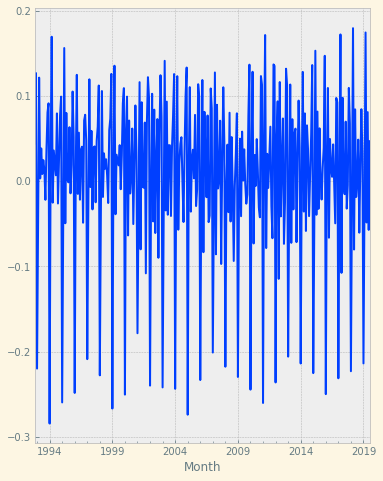

In [27]:

df_furniture['furniture_pct_change'].plot()

**Subtracting the mean**

You can also subtract the mean from every data point

In [28]:
fpa_mean = df_furniture['furniture_price_adjusted'].mean()
fpa_mean

df_furniture['furniture_diffmean'] = df_furniture['furniture_price_adjusted'] - fpa_mean
df_furniture.head()

,furniture_price_adjusted,furniture_log,furniture_diff,furniture_diff_second,furniture_pct_change,furniture_diffmean
Month,,,,,,
1992-11-01,2598.186297,7.862569,108.835459,210.834592,0.043720,-3491.593962
1992-12-01,2928.725684,7.982323,330.539387,439.374846,0.127219,-3161.054575
1993-01-01,2284.619439,7.733955,-644.106246,-313.566858,-0.219927,-3805.160820
1993-02-01,2183.137948,7.688519,-101.481490,-745.587736,-0.044419,-3906.642310
1993-03-01,2449.195623,7.803515,266.057675,164.576185,0.121869,-3640.584636


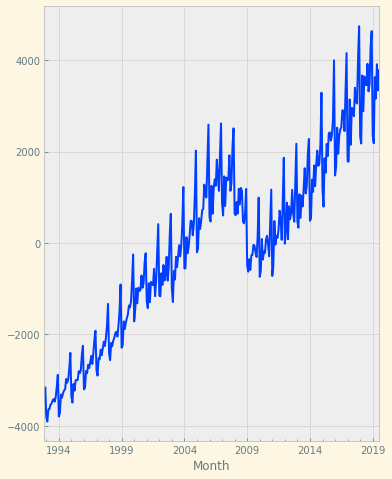

In [29]:
df_furniture['furniture_diffmean'].plot()